# Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

# Loading Packages and Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Structure and Content

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
testdata = pd.read_csv("test.csv")
testdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
#Size of the dataset
print(data.shape)
print(testdata.shape)

(8523, 12)
(5681, 11)


# EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
testdata.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# Univariate and Multivriate analysis

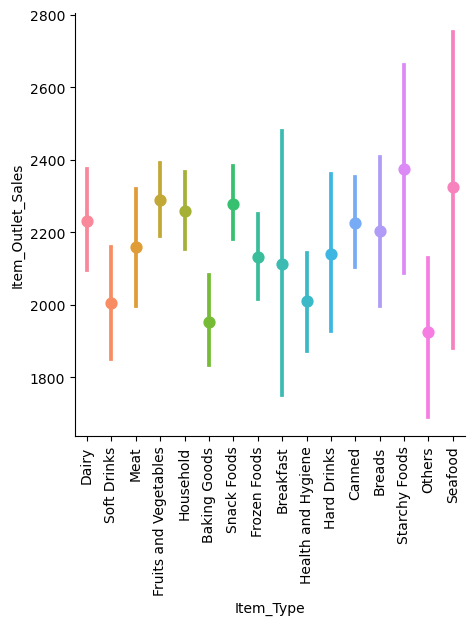

In [8]:
import seaborn as sns
sns.catplot(x = 'Item_Type', y = 'Item_Outlet_Sales', data = data, kind = 'point', hue = 'Item_Type')
plt.xticks(rotation = 90)
plt.show()

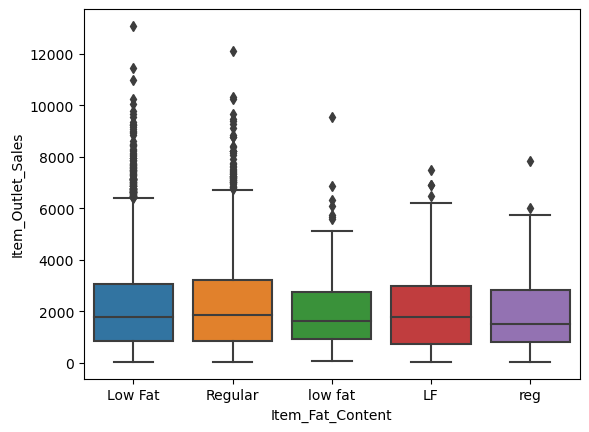

In [9]:
sns.boxplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = data)
plt.show()

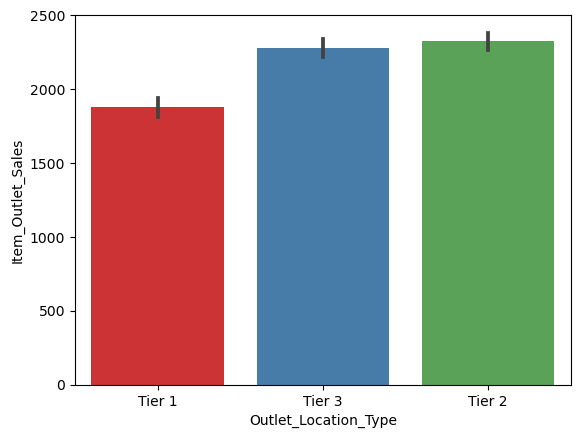

In [10]:
sns.barplot(x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', data = data, palette='Set1')
plt.show()

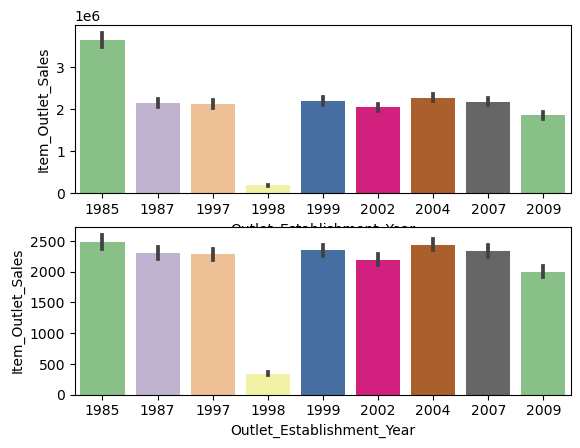

In [11]:
plt.subplot(2,1,1)
sns.barplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', data = data, palette='Accent', estimator = sum)
plt.subplot(2,1,2)
sns.barplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', data = data, palette='Accent')
plt.show()

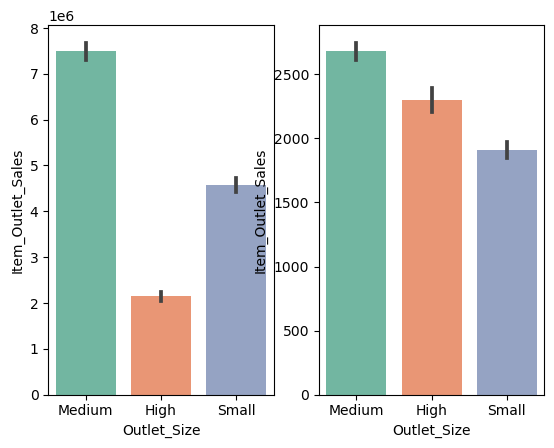

In [12]:
plt.subplot(1,2,1)
sns.barplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = data, palette='Set2', estimator = sum)
plt.subplot(1,2,2)
sns.barplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = data, palette='Set2')
plt.show()

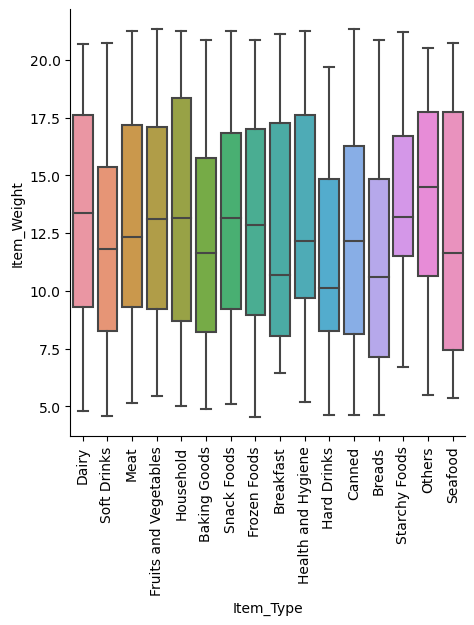

In [13]:
sns.catplot(x = 'Item_Type', y = 'Item_Weight', data = data, kind = 'box')
plt.xticks(rotation = 90)
plt.show()

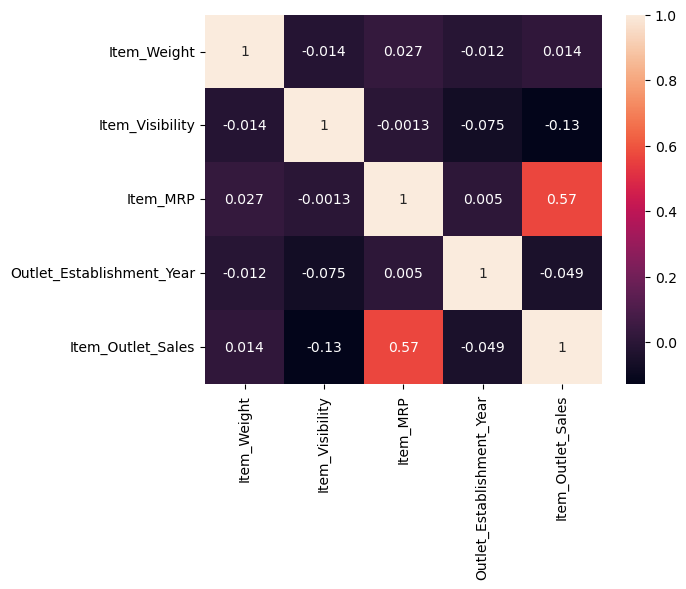

In [14]:
#Correlation
sns.heatmap(data.corr(), annot = True)
plt.show()

# Feature engineering - Encoding 

In [15]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data["Outlet_Type"] = ord_enc.fit_transform(data[["Outlet_Type"]])
data['Outlet_Location_Type'] =ord_enc.fit_transform(data[["Outlet_Location_Type"]])
data['Outlet_Size'] =ord_enc.fit_transform(data[["Outlet_Size"]])
data['Item_Fat_Content'] =ord_enc.fit_transform(data[["Item_Fat_Content"]])
data['Item_Type'] =ord_enc.fit_transform(data[["Item_Type"]])

In [16]:
data.drop(['Item_Identifier', 'Outlet_Identifier'], inplace=True, axis = 1)
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1.0,0.016047,4.0,249.8092,1999,1.0,0.0,1.0,3735.1380
1,5.920,2.0,0.019278,14.0,48.2692,2009,1.0,2.0,2.0,443.4228
2,17.500,1.0,0.016760,10.0,141.6180,1999,1.0,0.0,1.0,2097.2700
3,19.200,2.0,0.000000,6.0,182.0950,1998,NaN,2.0,0.0,732.3800
4,8.930,1.0,0.000000,9.0,53.8614,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1.0,0.056783,13.0,214.5218,1987,0.0,2.0,1.0,2778.3834
8519,8.380,2.0,0.046982,0.0,108.1570,2002,NaN,1.0,1.0,549.2850
8520,10.600,1.0,0.035186,8.0,85.1224,2004,2.0,1.0,1.0,1193.1136
8521,7.210,2.0,0.145221,13.0,103.1332,2009,1.0,2.0,2.0,1845.5976


In [17]:
#Outliers handling
q1 = data.Item_Visibility.quantile(0.25)
q3 = data.Item_Visibility.quantile(0.75)
ll = q1 - 1.5*(q3 - q1)
ul = q3 + 1.5*(q3 - q1)
def cap(x):
    if x < ll:
        x = ll
        return x
    elif x > ul:
        x = ul
        return x
    else:
        return x

In [18]:
data.Item_Visibility = data.Item_Visibility.apply(cap)
sns.boxplot(x = 'Item_Visibility', data = data)

<AxesSubplot:xlabel='Item_Visibility'>

In [19]:
testdata["Outlet_Type"] = ord_enc.fit_transform(testdata[["Outlet_Type"]])
testdata['Outlet_Location_Type'] =ord_enc.fit_transform(testdata[["Outlet_Location_Type"]])
testdata['Outlet_Size'] =ord_enc.fit_transform(testdata[["Outlet_Size"]])
testdata['Item_Fat_Content'] =ord_enc.fit_transform(testdata[["Item_Fat_Content"]])
testdata['Item_Type'] =ord_enc.fit_transform(testdata[["Item_Type"]])

In [20]:
testdata.drop(['Item_Identifier', 'Outlet_Identifier'], inplace=True, axis = 1)

In [21]:
q1 = testdata.Item_Visibility.quantile(0.25)
q3 = testdata.Item_Visibility.quantile(0.75)
ll = q1 - 1.5*(q3 - q1)
ul = q3 + 1.5*(q3 - q1)
def cap(x):
    if x < ll:
        x = ll
        return x
    elif x > ul:
        x = ul
        return x
    else:
        return x

In [22]:
testdata.Item_Visibility = testdata.Item_Visibility.apply(cap)
sns.boxplot(x = 'Item_Visibility', data = testdata)

<AxesSubplot:xlabel='Item_Visibility'>

# Missing Values

In [23]:
data.isna().mean()*100

Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [24]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(data)
data_imputed = pd.DataFrame(imputed, columns = data.columns)
data_imputed

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1.0,0.016047,4.0,249.8092,1999.0,1.0,0.0,1.0,3735.1380
1,5.920,2.0,0.019278,14.0,48.2692,2009.0,1.0,2.0,2.0,443.4228
2,17.500,1.0,0.016760,10.0,141.6180,1999.0,1.0,0.0,1.0,2097.2700
3,19.200,2.0,0.000000,6.0,182.0950,1998.0,2.0,2.0,0.0,732.3800
4,8.930,1.0,0.000000,9.0,53.8614,1987.0,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1.0,0.056783,13.0,214.5218,1987.0,0.0,2.0,1.0,2778.3834
8519,8.380,2.0,0.046982,0.0,108.1570,2002.0,1.0,1.0,1.0,549.2850
8520,10.600,1.0,0.035186,8.0,85.1224,2004.0,2.0,1.0,1.0,1193.1136
8521,7.210,2.0,0.145221,13.0,103.1332,2009.0,1.0,2.0,2.0,1845.5976


In [25]:
data_imputed.isna().mean()*100
data_imputed.Outlet_Size = round(data_imputed.Outlet_Size,)

In [26]:
testdata.isna().mean()*100

Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [27]:
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(testdata)
testdata_imputed = pd.DataFrame(imputed, columns = testdata.columns)
testdata_imputed

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,1.0,0.007565,13.0,107.8622,1999.0,1.000000,0.0,1.0
1,8.300000,4.0,0.038428,4.0,87.3198,2007.0,1.333333,1.0,1.0
2,14.600000,1.0,0.099575,11.0,241.7538,1998.0,1.666667,2.0,0.0
3,7.315000,1.0,0.015388,13.0,155.0340,2007.0,1.333333,1.0,1.0
4,13.981667,2.0,0.118599,4.0,234.2300,1985.0,1.000000,2.0,3.0
...,...,...,...,...,...,...,...,...,...
5676,10.500000,2.0,0.013496,13.0,141.3154,1997.0,2.000000,0.0,1.0
5677,7.600000,2.0,0.142991,15.0,169.1448,2009.0,1.000000,2.0,2.0
5678,10.000000,1.0,0.073529,8.0,118.7440,2002.0,1.333333,1.0,1.0
5679,15.300000,2.0,0.000000,3.0,214.6218,2007.0,1.666667,1.0,1.0


In [28]:
testdata_imputed.isna().mean()*100
testdata_imputed.Outlet_Size = round(testdata_imputed.Outlet_Size,)

# Modeling

In [29]:
X = data_imputed.iloc[:,:-1]
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,1.0,0.016047,4.0,249.8092,1999.0,1.0,0.0,1.0
1,5.920,2.0,0.019278,14.0,48.2692,2009.0,1.0,2.0,2.0
2,17.500,1.0,0.016760,10.0,141.6180,1999.0,1.0,0.0,1.0
3,19.200,2.0,0.000000,6.0,182.0950,1998.0,2.0,2.0,0.0
4,8.930,1.0,0.000000,9.0,53.8614,1987.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...
8518,6.865,1.0,0.056783,13.0,214.5218,1987.0,0.0,2.0,1.0
8519,8.380,2.0,0.046982,0.0,108.1570,2002.0,1.0,1.0,1.0
8520,10.600,1.0,0.035186,8.0,85.1224,2004.0,2.0,1.0,1.0
8521,7.210,2.0,0.145221,13.0,103.1332,2009.0,1.0,2.0,2.0


In [30]:
y = data_imputed.Item_Outlet_Sales
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection  import cross_val_score as CVS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=8)
def cross_val(model_name,model,X,y,cv):
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

# Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg_model = reg.fit(X_train, y_train)
lr_pred = reg.predict(X_test)
MSE=mean_squared_error(y_test,lr_pred)
MAE=mean_absolute_error(y_test,lr_pred)
r2=r2_score(y_test,lr_pred)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)
cross_val(reg,LinearRegression(),X,y,5)
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':lr_pred})
Linear_Regression.to_csv("Linear_Regression_output.csv")  

R squared value:  0.5151172899191354
Root Mean Squared Error :  1237.9612138823004
Mean Absolute Error :  919.8459790135727
LinearRegression() Scores:
0.52
0.5
0.49
0.5
0.5
Average LinearRegression() score: 0.5035


# Random Forest

In [33]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=6, random_state=0)
rfr_model = rfr.fit(X_train, y_train)
rfr_model_pred = rfr_model.predict(X_test)
MSE=mean_squared_error(y_test,rfr_model_pred)
MAE=mean_absolute_error(y_test,rfr_model_pred)
r2=r2_score(y_test,rfr_model_pred)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)
cross_val(rfr,RandomForestRegressor(),X,y,5)
RF=pd.DataFrame({'y_test':y_test,'prediction':rfr_model_pred})
RF.to_csv("Random_Forest_output.csv")  

R squared value:  0.6073184104420828
Root Mean Squared Error :  1114.0609693277709
Mean Absolute Error :  776.7216408627004
RandomForestRegressor(max_depth=6, random_state=0) Scores:
0.58
0.55
0.53
0.57
0.58
Average RandomForestRegressor(max_depth=6, random_state=0) score: 0.5628


# XGBoost

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
gbr_model = gbr.fit(X_train, y_train)
gbr_model_pred = gbr_model.predict(X_test)
MSE=mean_squared_error(y_test,gbr_model_pred)
MAE=mean_absolute_error(y_test,gbr_model_pred)
r2=r2_score(y_test,gbr_model_pred)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)
cross_val(gbr,GradientBoostingRegressor(),X,y,5)
xg=pd.DataFrame({'y_test':y_test,'prediction':gbr_model_pred})
xg.to_csv("XGBoost_output.csv") 

R squared value:  0.6064262268636367
Root Mean Squared Error :  1115.3258401547728
Mean Absolute Error :  779.6221411687008
GradientBoostingRegressor(random_state=0) Scores:
0.61
0.59
0.58
0.61
0.61
Average GradientBoostingRegressor(random_state=0) score: 0.599


# Lasso Regressor 

In [35]:
#Regularized Linear Regression
#L1 regularization - Lasso regression

from sklearn.linear_model import Lasso
LS = Lasso(alpha=1)
Lasso_model = LS.fit(X_train, y_train)
Lasso_pred = LS.predict(X_test)
MSE=mean_squared_error(y_test,Lasso_pred)
MAE=mean_absolute_error(y_test,Lasso_pred)
r2=r2_score(y_test,Lasso_pred)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)
cross_val(LS,Lasso(alpha = 0.05),X,y,5)
lr=pd.DataFrame({'y_test':y_test,'prediction':Lasso_pred})
lr.to_csv("Lasso_resgressor_output.csv") 

R squared value:  0.5141677191582325
Root Mean Squared Error :  1239.1728025656769
Mean Absolute Error :  920.430376170339
Lasso(alpha=1) Scores:
0.52
0.5
0.49
0.5
0.5
Average Lasso(alpha=1) score: 0.5035


# Ridge regression

In [36]:
#Regularized Linear Regression
#L2 regularization - Ridge regression

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge_model = ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
MSE=mean_squared_error(y_test,ridge_pred)
MAE=mean_absolute_error(y_test,ridge_pred)
r2=r2_score(y_test,ridge_pred)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)
cross_val(ridge,Ridge(alpha = 1.0),X,y,5)
lr=pd.DataFrame({'y_test':y_test,'prediction':ridge_pred})
lr.to_csv("Ridge_resgressor_output.csv") 

R squared value:  0.5149764534030663
Root Mean Squared Error :  1238.1409867246764
Mean Absolute Error :  919.9330085391427
Ridge() Scores:
0.52
0.5
0.49
0.5
0.5
Average Ridge() score: 0.5035


# Saving model as a pickle file

In [37]:
import pickle
pickle.dump(reg, open('model.pkl','wb'))
reg = pickle.load(open('model.pkl','rb'))